In [4]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict

In [10]:
#define state

class BMIState(TypedDict):
    weight_kg : float
    Height_m : float
    bmi : float
    catagory : str

In [6]:
def calculate_bmi(state:BMIState) ->BMIState:
    """This calculates BMI from weight and height"""
    weight = state['weight_kg']
    height = state['Height_m']
    bmi = weight / (height **2)
    
    state['bmi'] = round(bmi , 2)
    return state

In [11]:
def lable_bmi(state:BMIState) ->BMIState:
    """this will lable based on the BMI value"""

    bmi = state['bmi']

    if bmi < 18.5:
        state['catagory'] = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        state['catagory'] = 'Normal weight'
    elif 25 <= bmi < 29.9:
        state['catagory'] = 'Overweight'
    else:
        state['catagory'] = 'Obesity'
    return state

In [12]:
# define you graph
graph = StateGraph(BMIState)


# add nodes to your graph
graph.add_node("calculate_bmi", calculate_bmi)
graph.add_node("lable_bmi" , lable_bmi)

# add edges to you graph
graph.add_edge(START , "calculate_bmi")
graph.add_edge("calculate_bmi" , "lable_bmi")
graph.add_edge('lable_bmi' , END)


# compile your graph
workflow =graph.compile()




In [13]:
workflow.invoke({'weight_kg':80 , 'Height_m':1.73})

{'weight_kg': 80, 'Height_m': 1.73, 'bmi': 26.73, 'catagory': 'Overweight'}

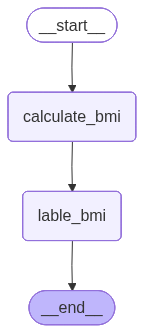

In [14]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())